<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп».
1. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.
2. Обоснуйте корректность его работы.
3. Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.
4. Подбирать наилучшую модель не требуется.

## Анализ данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/datasets/insurance.csv')
df.columns = ['male', 'age', 'income', 'family', 'payments']
df 

,male,age,income,family,payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


`male` - пол клиента,  
`age` - возраст клиента,  
`income` - зарплата застрахованного,  
`family` - количество членов его семьи,  
`payments` - количество страховых выплат клиенту за последние 5 лет

In [4]:
df.isna().sum()

male        0
age         0
income      0
family      0
payments    0
dtype: int64

данные без пропусков

In [5]:
df.duplicated().sum()

153

Имеются дубликаты, но характер данных не позволяет утверждать, что это истинные дубликаты. Для исключения подобных случаев желательно в будущем предоставлять данные с id клиента.  
В нашем случае наличие и отсуствие дубликатов не окажет влияние на дальнейший анализ, поэтому оставим как есть.

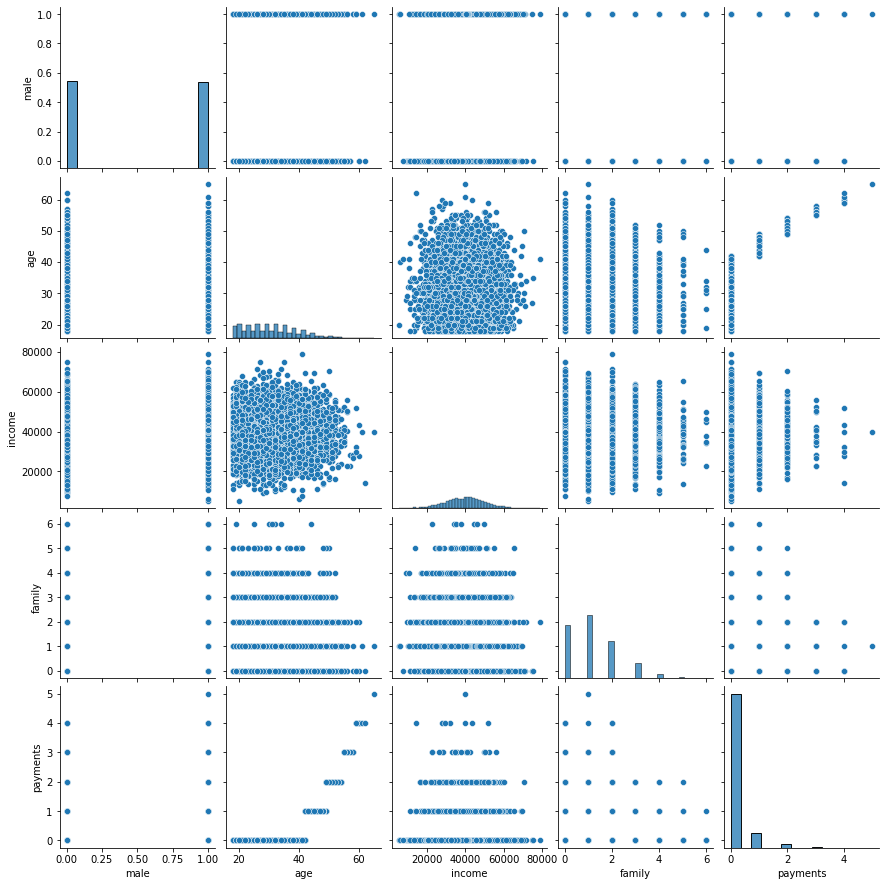

In [6]:
sns.pairplot(df)

Данные равномерно распределены и не требуют предобработки.  
Можно обратить внимание, что самым явным признаком страховых выплат является возраст клиента.   
Но это не соотносится с целью данной работы. 

## Умножение матриц

Попытаемся ответить на вопрос. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? Можно ли обучить её после этого заново?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:**  
Так как 
$a = Xw,$ и $w = (X^T X)^{-1} X^T y$


$$a = X(X^T X)^{-1} X^T y$$


Домножим матрицу признаков Х на матрицу Р
$$a = XP((XP)^T XP)^{-1} (XP)^T y$$


Согласно свойству матриц $(AB)^T =  B^T A^T$ и $(AB)^{-1} =  B^{-1} A^{-1}$ раскроем скобки


$$a = XP(P^T X^T XP)^{-1} P^T X^T y$$


$$a = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$


Согласно свойству матриц   $EA=AE=A$ и $A^{-1}A=E $ где E - единичная матрица

$$a = X E (X^T X)^{-1} E X^T y$$


$$a = X (X^T X)^{-1} X^T y$$

Что является исходным равенством. Соотвественно домножение матрицы признаков Х на матрицу Р не изменило исходного предсказания

## Алгоритм преобразования

**Алгоритм**

Преобразовать изначальную матрицу умножив на квадратную, обратимую матрицу размером равным количеству признаков исходной матрицы

**Обоснование**

Было доказано, что домножение матрицы признаков Х на обратимую матрицу Р не изменит исходного предсказания, но преобразует данные к виду, по которому сложно восстановить персональную информацию.  
Чтобы размер исходной матрицы признаков X не изменился, матрица P должна быть квадратной с размером равной количеству признаков матрицы X.

## Проверка алгоритма

R2 на чистых данных

In [7]:
lr = LinearRegression()
lr.fit(df.drop('payments', axis=1), df.payments)
r2_score(df.payments, lr.predict(df.drop('payments', axis=1)))

0.42494550286668

Зашифруем данные

In [8]:
sq_side = df.drop('payments', axis=1).shape[1] # размер квадратной матрицы

while True: #цикл создания обратимой матрицы
  try:
    P = np.random.rand(sq_side,sq_side)
    np.linalg.inv(P)
    break
  except np.linalg.LinAlgError: # пересоздание в случае если матрица необратима   
    continue

df_dot_P = df.drop('payments', axis=1) @ P # закодированные данные

После кодировки данные принимают вид

In [9]:
df_dot_P

,0,1,2,3
0,32947.200551,7209.296938,26359.913777,7999.712717
1,25252.806726,5535.398196,20208.068408,6131.364819
2,13957.641771,3061.608413,11170.454615,3388.877928
3,27690.635925,6050.223316,22149.493690,6722.712672
4,17341.419533,3798.818069,13876.620101,4210.950202
...,...,...,...,...
4995,23714.054427,5188.378854,18971.884631,5757.598543
4996,34800.155805,7607.875997,27838.710521,8448.623713
4997,22513.602857,4921.301342,18009.384878,5465.991733
4998,21719.665699,4750.713646,17375.865987,5274.239996


R2 на зашифрованных данных

In [10]:
lr = LinearRegression()
lr.fit(df_dot_P, df.payments)
r2_score(df.payments, lr.predict(df_dot_P))

0.42494550286668065

## Вывод

При использовании линейной регрессии, шифрование признаков умножением на случайную матрицу позволяет скрыть персональную информацию, сохранив качество модели